In [1]:
import os
#os.chdir(r"data\raw_data")     # 데이터를 불러올 작업 경로를 설정해주세요

import pandas as pd

raw_data = pd.read_csv(r"data\raw_data\2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_2015~2020통합본.csv", encoding="cp949", thousands = ',' )
raw_salmon = pd.read_csv(r"data\raw_data\연어RAW데이터.csv", encoding="cp949") #raw_data 에서 P_NAME == "연어" 를 뽑아낸 csv
raw_squid = pd.read_csv(r"data\raw_data\오징어RAW데이터.csv", encoding="cp949") #raw_data 에서 P_NAME == "오징어" 를 뽑아낸 csv
raw_shrimp = pd.read_csv(r"data\raw_data\흰다리새우RAW데이터.csv", encoding="cp949") #raw_data 에서 P_NAME == "흰다리새우" 를 뽑아낸 csv
external_data = pd.read_csv(r"data\raw_data\외부데이터모음(2015~2021).csv", encoding="cp949")




In [2]:
# # 결측치 0 처리 
# zero =  pd.read_csv(r"data\result\squid_result_0.4_16.7.csv", encoding='cp949')
# zero = zero.fillna(0)

# zero

# zero.to_csv(r"data\result\squid_result_0.4_16.7.csv", encoding='cp949')


# 결측치 확인

In [3]:
print(raw_data.info(null_counts=True))
print(raw_salmon.info(null_counts=True))
print(raw_squid.info(null_counts=True))
print(raw_shrimp.info(null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51552 entries, 0 to 51551
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REG_DATE       51552 non-null  object 
 1   P_TYPE         51552 non-null  object 
 2   CTRY_1         51552 non-null  object 
 3   CTRY_2         51552 non-null  object 
 4   P_PURPOSE      51552 non-null  object 
 5   CATEGORY_1     51552 non-null  object 
 6   CATEGORY_2     51552 non-null  object 
 7   P_NAME         51552 non-null  object 
 8   P_IMPORT_TYPE  51552 non-null  object 
 9   P_PRICE        51552 non-null  float64
dtypes: float64(1), object(9)
memory usage: 3.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REG_DATE       1895 non-null   object 
 1   P_TYPE         1895 non-null   object 
 2   CTRY_1         189

C:\Users\one1e\AppData\Local\Temp/ipykernel_14144/738747599.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(raw_data.info(null_counts=True))
C:\Users\one1e\AppData\Local\Temp/ipykernel_14144/738747599.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(raw_salmon.info(null_counts=True))
C:\Users\one1e\AppData\Local\Temp/ipykernel_14144/738747599.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(raw_squid.info(null_counts=True))
C:\Users\one1e\AppData\Local\Temp/ipykernel_14144/738747599.py:4: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(raw_shrimp.info(null_counts=True))


# 특이사항
## 흰다리새우 전처리후 2017-10-02 수입품목 단 1건
## 오징어 2016-02-08, 2017-10-02 수입안함

# 1. 간단한 시각화로 P_PRICE 살펴보기

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

#내부에 결과를 출력하도록 설정
%matplotlib inline

#시각화 한글 폰트 설정
#윈도우 사용자
plt.rc('font',family='Malgun Gothic')

#마이너스 기호 출력 
plt.rc('axes', unicode_minus=False)

#분석에 문제가 없는 경고 메시지는 숨긴다
import warnings 
warnings.filterwarnings('ignore')

In [5]:
rawdata  = raw_data.copy()
rawsalmon = raw_salmon.copy()
rawsquid = raw_squid.copy()
rawshrimp = raw_shrimp.copy()

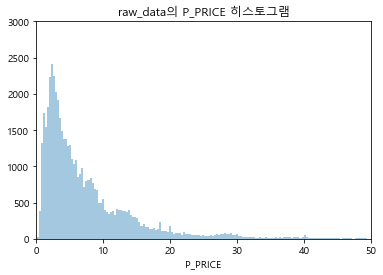

In [6]:
sns.distplot(rawdata['P_PRICE'], kde=False, bins=5000)
plt.axis([0,50,0,3000])  # X축 최솟값, Y축 최댓값, Y축 최솟값, Y축 최댓값
plt.title("raw_data의 P_PRICE 히스토그램")
plt.show()

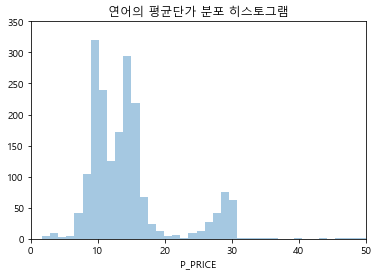

In [7]:
sns.distplot(rawsalmon['P_PRICE'], kde=False, bins=50)
plt.axis([0,50,0,350])  # X축 최솟값, Y축 최댓값, Y축 최솟값, Y축 최댓값
plt.title("연어의 평균단가 분포 히스토그램")
plt.show()

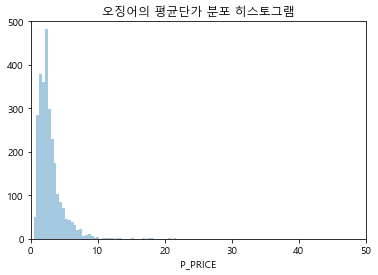

In [8]:
sns.distplot(rawsquid['P_PRICE'], kde=False, bins=50)
plt.axis([0,50,0,500])  # X축 최솟값, Y축 최댓값, Y축 최솟값, Y축 최댓값
plt.title("오징어의 평균단가 분포 히스토그램")
plt.show()

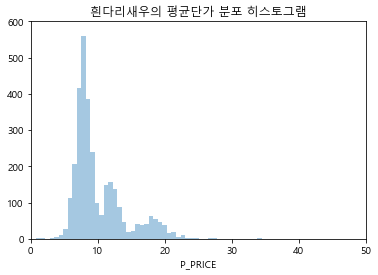

In [9]:
sns.distplot(rawshrimp['P_PRICE'], kde=False, bins=50)
plt.axis([0,50,0,600])  # X축 최솟값, Y축 최댓값, Y축 최솟값, Y축 최댓값
plt.title("흰다리새우의 평균단가 분포 히스토그램")
plt.show()

# 연어, 오징어, 흰다리새우 각각 다른 파생변수를 만들어 모델을 구축해야함
# 따라서 각각 따로 나누어 이 이상 자세한 분석은 Tableau , PowerBI 사용
## 더 자세한 기본변수 분석을 통해 수입 Trend 반영을 위한 데이터 제거 및 이상치 변환 -> process_codes 폴더에 정리 

---------------------------------------------------------------------------------------------------------------------------------------------------
# 연어, 오징어, 흰다리새우 공통 기본변수 9개, 타켓변수 p_price 1개 
## reg_date(기준일), p_type(제품구분), ctry_1(제조국), ctry_2(수출국), 
## p_purpose(수입용도), category_1(중분류명 카테고리), category_2(어종), p_name(상세어종), 
## p_import_type(수입형태), p_price(평균단가($))
---------------------------------------------------------------------------------------------------------------------------------------------------

# 1. REG_DATE와 P_PRICE의 상관도 파악 후 파생변수 생성 

# (1) 요일 변수를 생성

## 분석결과 : 월요일마다 평균단가가 기록되었는데 오직 2017년 1월 1일 2017년 1월 6일 event로 일,금요일 거래,  요일 변수는 유의미하지 않다고 판단 

In [10]:
rawsalmon['REG_DATE'] = pd.to_datetime(rawsalmon['REG_DATE'])
rawsalmon['weekday'] = rawsalmon['REG_DATE'].dt.strftime('%a')
idx = rawsalmon[(rawsalmon['weekday'] == 'Sun') | (rawsalmon['weekday'] == 'Fri')].index

print(idx)
mask1 = rawsalmon['weekday']=='Sun'
mask2 = rawsalmon['weekday']=='Fri'
mask3 = mask1|mask2
rawsalmon[mask3]


Int64Index([400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
            413, 414],
           dtype='int64')


,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,weekday
400,2017-01-01,수산물,캐나다,캐나다,판매용,어류,연어,연어,냉장,11.48,Sun
401,2017-01-01,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",27.53,Sun
402,2017-01-01,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",17.65,Sun
403,2017-01-01,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,13.13,Sun
404,2017-01-01,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",16.88,Sun
405,2017-01-01,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",14.98,Sun
406,2017-01-01,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,13.02,Sun
407,2017-01-06,수산물,영국,영국,판매용,어류,연어,연어,냉장,11.61,Fri
408,2017-01-06,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",28.07,Fri
409,2017-01-06,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",17.24,Fri


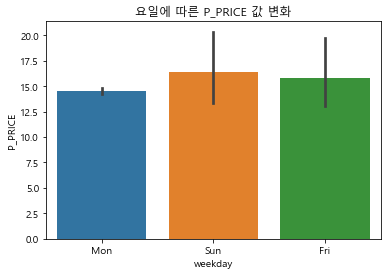

In [11]:
sns.barplot(x='weekday', y='P_PRICE', data=rawsalmon)
plt.title("요일에 따른 P_PRICE 값 변화")
plt.show()

Int64Index([448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460,
            461, 462, 463, 464, 465, 466, 467, 468, 469],
           dtype='int64')
      REG_DATE P_TYPE CTRY_1 CTRY_2 P_PURPOSE CATEGORY_1 CATEGORY_2 P_NAME  \
448 2017-01-01    수산물     중국     중국       판매용   연체류 해물모듬        오징어    오징어   
449 2017-01-01    수산물     중국     중국       판매용   연체류 해물모듬        오징어    오징어   
450 2017-01-01    수산물     페루     페루   자사제품제조용   연체류 해물모듬        오징어    오징어   
451 2017-01-01    수산물     중국     중국       판매용   연체류 해물모듬        오징어    오징어   
452 2017-01-01    수산물     페루     페루   자사제품제조용   연체류 해물모듬        오징어    오징어   
453 2017-01-01    수산물     대만     대만       판매용   연체류 해물모듬        오징어    오징어   
454 2017-01-01    수산물     페루     페루       판매용   연체류 해물모듬        오징어    오징어   
455 2017-01-01    수산물     페루     페루       판매용   연체류 해물모듬        오징어    오징어   
456 2017-01-01    수산물     칠레     칠레       판매용   연체류 해물모듬        오징어    오징어   
457 2017-01-01    수산물     페루     페루   자사제품제조용   연체류 해물모듬   

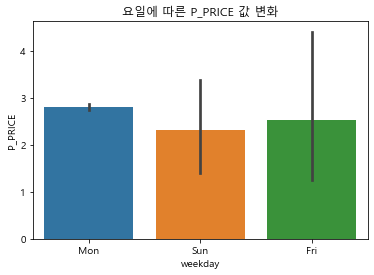

In [12]:
rawsquid['REG_DATE'] = pd.to_datetime(rawsquid['REG_DATE'])
rawsquid['weekday'] = rawsquid['REG_DATE'].dt.strftime('%a')
idx = rawsquid[(rawsquid['weekday'] == 'Sun') | (rawsquid['weekday'] == 'Fri')].index

print(idx)
mask1 = rawsquid['weekday']=='Sun'
mask2 = rawsquid['weekday']=='Fri'
mask3 = mask1|mask2
print(rawsquid[mask3])
sns.barplot(x='weekday', y='P_PRICE', data=rawsquid)
plt.title("요일에 따른 P_PRICE 값 변화")
plt.show()

Int64Index([662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674,
            675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687,
            688],
           dtype='int64')
      REG_DATE P_TYPE   CTRY_1   CTRY_2 P_PURPOSE CATEGORY_1 CATEGORY_2  \
662 2017-01-01    수산물       중국       중국       판매용        갑각류         새우   
663 2017-01-01    수산물       중국       중국       판매용        갑각류         새우   
664 2017-01-01    수산물       인도       인도       판매용        갑각류         새우   
665 2017-01-01    수산물      파나마      파나마       판매용        갑각류         새우   
666 2017-01-01    수산물      베트남      베트남       판매용        갑각류         새우   
667 2017-01-01    수산물      베트남      베트남       판매용        갑각류         새우   
668 2017-01-01    수산물    말레이시아    말레이시아       판매용        갑각류         새우   
669 2017-01-01    수산물      베트남      베트남       판매용        갑각류         새우   
670 2017-01-01    수산물      베트남      베트남       판매용        갑각류         새우   
671 2017-01-01    수산물     에콰도르     에콰도르       판매용   

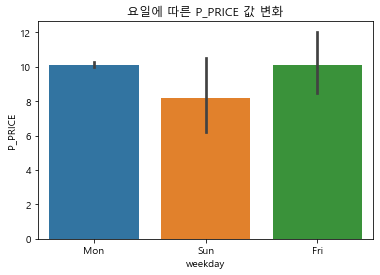

In [13]:
rawshrimp['REG_DATE'] = pd.to_datetime(rawshrimp['REG_DATE'])
rawshrimp['weekday'] = rawshrimp['REG_DATE'].dt.strftime('%a')
idx = rawshrimp[(rawshrimp['weekday'] == 'Sun') | (rawshrimp['weekday'] == 'Fri')].index

print(idx)
mask1 = rawshrimp['weekday']=='Sun'
mask2 = rawshrimp['weekday']=='Fri'
mask3 = mask1|mask2
print(rawshrimp[mask3])
sns.barplot(x='weekday', y='P_PRICE', data=rawshrimp)
plt.title("요일에 따른 P_PRICE 값 변화")
plt.show()

# (2) 월 변수를 생성 

## 분석결과 : 월 변수는 유의미한 변수로 판단, MONTH, MONTH_MEAN 변수생성 

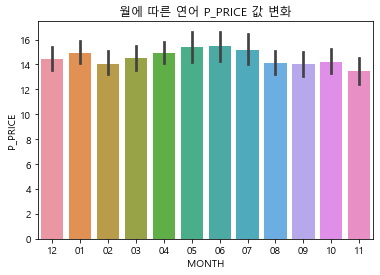

In [14]:
rawsalmon['REG_DATE'] = pd.to_datetime(rawsalmon['REG_DATE'])
rawsalmon['MONTH'] = rawsalmon['REG_DATE'].dt.strftime('%m')

sns.barplot(x='MONTH', y='P_PRICE', data=rawsalmon)
plt.title("월에 따른 연어 P_PRICE 값 변화")
plt.show()

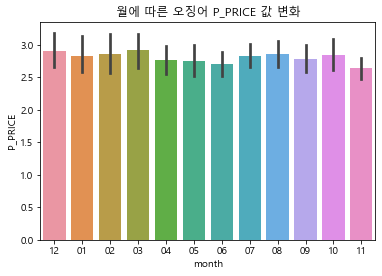

In [15]:
rawsquid['REG_DATE'] = pd.to_datetime(rawsquid['REG_DATE'])
rawsquid['month'] = rawsquid['REG_DATE'].dt.strftime('%m')

sns.barplot(x='month', y='P_PRICE', data=rawsquid)
plt.title("월에 따른 오징어 P_PRICE 값 변화")
plt.show()

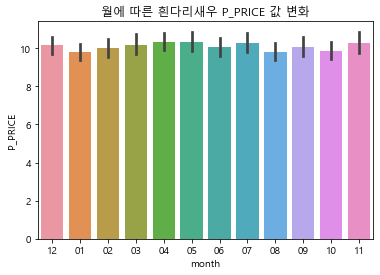

In [16]:
rawshrimp['REG_DATE'] = pd.to_datetime(rawshrimp['REG_DATE'])
rawshrimp['month'] = rawshrimp['REG_DATE'].dt.strftime('%m')

sns.barplot(x='month', y='P_PRICE', data=rawshrimp)
plt.title("월에 따른 흰다리새우 P_PRICE 값 변화")
plt.show()

# 2. p_type(제품구분) 

##  '수산물' 로 동일 

# 3. ctry_1(제조국)

## 연어, 흰다리새우는 제조국과 수출국이 다를 때 경우의 수는 수입 Trend 반영 과정에서 제거되었음, 고려하지 않아도 됨
## 오징어의 경우 제조국과 수출국이 다를 때 같은 품목임에도 P_PRICE가 증가하는 경향(process_codes참고) , 유의미한 변수로서 CTRY_DIF 변수로 활용 

In [25]:
data =  pd.read_csv(r"data\raw_data\오징어RAW데이터.csv", encoding="cp949")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
is_nation = data['CTRY_1'] != data['CTRY_2']
nation = data[is_nation]
nation

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
33,2016-01-25,수산물,칠레,일본,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",0.500000
39,2016-02-01,수산물,대한민국,중국,판매용,연체류 해물모듬,오징어,오징어,냉동,1.700000
57,2016-02-22,수산물,칠레,일본,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",1.520000
124,2016-04-25,수산물,대한민국,중국,판매용,연체류 해물모듬,오징어,오징어,냉동,2.150000
161,2016-05-30,수산물,대한민국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,지느러미",1.220000
198,2016-07-04,수산물,대한민국,중국,판매용,연체류 해물모듬,오징어,오징어,냉동,2.300000
210,2016-07-18,수산물,대한민국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,지느러미",1.220000
260,2016-08-29,수산물,페루,칠레,자사제품제조용,연체류 해물모듬,오징어,오징어,"냉동,동체,자숙",3.930000
261,2016-08-29,수산물,페루,칠레,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",1.580000
262,2016-08-29,수산물,페루,칠레,자사제품제조용,연체류 해물모듬,오징어,오징어,"냉동,지느러미,자숙",2.640000


In [18]:
squid = pd.read_csv(r'process_codes/conversion_data/오징어_데이터전처리1(2021.09.08).csv')
squid.drop('Unnamed: 0', axis=1, inplace=True)

is_nation = squid['CTRY_1'] != squid['CTRY_2']
nation = squid[is_nation]
print(nation)
print(len(nation))


        REG_DATE P_TYPE CTRY_1 CTRY_2 P_PURPOSE CATEGORY_1 CATEGORY_2 P_NAME  \
33    2016-01-25    수산물     칠레     일본       판매용   연체류 해물모듬        오징어    오징어   
39    2016-02-01    수산물   대한민국     중국       판매용   연체류 해물모듬        오징어    오징어   
57    2016-02-22    수산물     칠레     일본       판매용   연체류 해물모듬        오징어    오징어   
124   2016-04-25    수산물   대한민국     중국       판매용   연체류 해물모듬        오징어    오징어   
161   2016-05-30    수산물   대한민국     중국       판매용   연체류 해물모듬        오징어    오징어   
...          ...    ...    ...    ...       ...        ...        ...    ...   
2676  2020-11-23    수산물   뉴질랜드     중국       판매용   연체류 해물모듬        오징어    오징어   
2722  2020-12-21    수산물   대한민국     중국       판매용   연체류 해물모듬        오징어    오징어   
2731  2020-12-28    수산물   대한민국     중국       판매용   연체류 해물모듬        오징어    오징어   
2753  2020-12-21    수산물   대한민국     중국       판매용   연체류 해물모듬        오징어    오징어   
2762  2020-12-28    수산물   대한민국     중국       판매용   연체류 해물모듬        오징어    오징어   

     P_IMPORT_TYPE  P_PRICE  
33       

In [19]:
is_nation = rawshrimp['CTRY_1'] != rawshrimp['CTRY_2']
nation = rawshrimp[is_nation]
nation

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,weekday,month
114,2016-02-29,수산물,베트남,일본,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙,포장횟감",21.52,Mon,02
360,2016-07-18,수산물,베트남,일본,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙,포장횟감",24.58,Mon,07
1098,2017-08-21,수산물,베트남,일본,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙,포장횟감",18.10,Mon,08
1272,2017-11-20,수산물,베트남,일본,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙,포장횟감",16.75,Mon,11
1664,2018-07-02,수산물,베트남,일본,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙,포장횟감",20.47,Mon,07


# 4. ctry_2(수출국)와 P_PRICE 간 영향도 판단 : process_codes 참고, ctry_2 별 평균가격은 0

In [20]:
shrimp = pd.read_csv(r'process_codes/conversion_data/흰다리새우_데이터전처리2(2021.09.08).csv')
shrimp.drop('Unnamed: 0', axis=1, inplace=True)

squid = pd.read_csv(r'process_codes/conversion_data/오징어_데이터전처리1(2021.09.08).csv')
squid.drop('Unnamed: 0', axis=1, inplace=True)

salmon = pd.read_csv(r'process_codes/conversion_data/연어_데이터전처리1(2021.09.08).csv')
salmon.drop('Unnamed: 0', axis=1, inplace=True)

print(salmon)

date_price_mean = salmon.groupby(['REG_DATE'])['P_PRICE'].mean()
date_price_mean.to_csv('process_codes/연어 주별 평균단가.csv')

date_price_mean = squid.groupby(['REG_DATE'])['P_PRICE'].mean()
date_price_mean.to_csv('process_codes/오징어 주별 평균단가.csv')

date_price_mean = shrimp.groupby(['REG_DATE'])['P_PRICE'].mean()
date_price_mean.to_csv('process_codes/흰다리새우 주별 평균단가.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'process_codes/conversion_data/흰다리새우_데이터전처리2(2021.09.08).csv'

# MONTH 변수 만들기

In [ ]:
salmon_result = pd.read_csv(r"data\result\salmon_result.csv", encoding="UTF8")

salmon_result['REG_DATE'] = pd.to_datetime(salmon_result['REG_DATE'])
salmon_result['MONTH'] = salmon_result['REG_DATE'].dt.strftime('%m')

print(salmon_result)
salmon_result.to_csv('data/result/salmon_result.csv', encoding="cp949")


     Unnamed: 0  Unnamed: 0.1   REG_DATE  자사제품제조용 냉장  자사제품제조용 냉장,포장횟감,필렛(F)  \
0             0             0 2015-12-28       8.420                 15.495   
1             1             1 2016-01-04       8.970                 15.495   
2             2             2 2016-01-11       8.850                 15.495   
3             3             3 2016-01-18       8.220                 15.495   
4             4             4 2016-01-25       8.210                 15.495   
..          ...           ...        ...         ...                    ...   
257         257           257 2020-11-30       7.200                 15.190   
258         258           258 2020-12-07       8.225                 15.190   
259         259           259 2020-12-14       8.285                 15.190   
260         260           260 2020-12-21       8.435                 15.190   
261         261           261 2020-12-28       8.875                 15.200   

     자사제품제조용 냉장,필렛(F)     판매용 냉장  판매용 냉장,포장횟감,필렛(F)

In [ ]:
squid_result = pd.read_csv(r"data\result\squid_result.csv", encoding="cp949")

squid_result['REG_DATE'] = pd.to_datetime(squid_result['REG_DATE'])
squid_result['MONTH'] = squid_result['REG_DATE'].dt.strftime('%m')

print(squid_result)
squid_result.to_csv('data/result/squid_result.csv', encoding="cp949")

      REG_DATE        냉동     냉동,다리     냉동,동체  냉동,동체,자숙  냉동,지느러미  \
0   2015-12-28  0.000000  1.100000  1.246667     5.480   0.7600   
1   2016-01-04  0.000000  1.016667  1.020000     4.475   0.6400   
2   2016-01-11  0.000000  1.040000  1.045000     3.740   0.7550   
3   2016-01-18  0.000000  1.140000  0.890000     4.095   0.7200   
4   2016-01-25  0.000000  1.060000  0.940000     5.005   0.6000   
..         ...       ...       ...       ...       ...      ...   
255 2020-11-30  3.003333  1.975000  1.440000     3.945   1.0800   
256 2020-12-07  3.436667  2.200000  1.940000     4.305   1.0900   
257 2020-12-14  3.383333  2.076667  1.395000     3.530   1.3775   
258 2020-12-21  3.542500  2.150000  1.470000     3.180   0.9800   
259 2020-12-28  3.180000  2.065000  1.745000     2.910   1.3300   

     대만,뉴질랜드,러시아,냉동c  미국,인도네시아,에콰도르,우루과이,에콰도르,베트남,스페인,냉동c  아르헨티나,냉동c  중국,냉동c  \
0                  0                                    0          0       0   
1                  0               

In [ ]:
shrimp_result = pd.read_csv(r"data\result\shrimp_result.csv", encoding="cp949")

shrimp_result['REG_DATE'] = pd.to_datetime(shrimp_result['REG_DATE'])
shrimp_result['MONTH'] = shrimp_result['REG_DATE'].dt.strftime('%m')

print(shrimp_result)
shrimp_result.to_csv('data/result/shrimp_result.csv', encoding="cp949")

      REG_DATE  베트남 냉동,살  태국 냉동,살,자숙  베트남 냉동,살,포장횟감  베트남 냉동,살,자숙  주별 냉동 총합  \
0   2015-12-28      8.40       13.38          12.90         7.42     33.05   
1   2016-01-04      7.56       14.59          10.86         7.52     28.84   
2   2016-01-11      8.12       12.78          13.62         8.03     21.28   
3   2016-01-18      8.44       12.32          11.70         7.40     20.83   
4   2016-01-25      8.08       12.08           9.67         8.03     27.85   
..         ...       ...         ...            ...          ...       ...   
283        NaT       NaN         NaN            NaN          NaN       NaN   
284        NaT       NaN         NaN            NaN          NaN       NaN   
285        NaT       NaN         NaN            NaN          NaN       NaN   
286        NaT       NaN         NaN            NaN          NaN       NaN   
287        NaT       NaN         NaN            NaN          NaN       NaN   

     주별 냉동,자숙 총합  주별 냉동,살 총합  주별 냉동,살,자숙,포장횟감 총합  냉동C  냉동,자숙C  

In [ ]:
df = pd.read_csv(r"data\result\shrimp_result.csv", encoding = 'cp949')

def month_mean():
    df['MONTH_MEAN'] = 1
    index1 = df.query('MONTH==1').index
    index2 = df.query('MONTH==2').index
    index3 = df.query('MONTH==3').index
    index4 = df.query('MONTH==4').index
    index5 = df.query('MONTH==5').index
    index6 = df.query('MONTH==6').index
    index7 = df.query('MONTH==7').index
    index8 = df.query('MONTH==8').index
    index9 = df.query('MONTH==9').index
    index10 = df.query('MONTH==10').index
    index11 = df.query('MONTH==11').index
    index12 = df.query('MONTH==12').index

    #인덱스를 활용해서 'MONTH_MEAN'의 값을 각 월에 맞는 평균 P_PRICE 값으로 변경 

    df.iloc[index1,-1] = df.query('MONTH==1')['P_PRICE'].mean()
    df.iloc[index2,-1] = df.query('MONTH==2')['P_PRICE'].mean()
    df.iloc[index3,-1] = df.query('MONTH==3')['P_PRICE'].mean()
    df.iloc[index4,-1] = df.query('MONTH==4')['P_PRICE'].mean()
    df.iloc[index5,-1] = df.query('MONTH==5')['P_PRICE'].mean()
    df.iloc[index6,-1] = df.query('MONTH==6')['P_PRICE'].mean()
    df.iloc[index7,-1] = df.query('MONTH==7')['P_PRICE'].mean()
    df.iloc[index8,-1] = df.query('MONTH==8')['P_PRICE'].mean()
    df.iloc[index9,-1] = df.query('MONTH==9')['P_PRICE'].mean()
    df.iloc[index10,-1] = df.query('MONTH==10')['P_PRICE'].mean()
    df.iloc[index11,-1] = df.query('MONTH==11')['P_PRICE'].mean()
    df.iloc[index12,-1] = df.query('MONTH==12')['P_PRICE'].mean()

    return df

df = month_mean()
df.to_csv('data/result/shrimp_result.csv', encoding="cp949")


,REG_DATE,자사제품제조용 냉장,"자사제품제조용 냉장,포장횟감,필렛(F)","자사제품제조용 냉장,필렛(F)",판매용 냉장,"판매용 냉장,포장횟감,필렛(F)","판매용 냉장,필렛(F)","판매용 냉장,필렛(F),횟감",c자사제품제조용 냉장,"c자사제품제조용 냉장,포장횟감,필렛(F)","c자사제품제조용 냉장,필렛(F)",c판매용 냉장,"c판매용 냉장,포장횟감,필렛(F)","c판매용 냉장,필렛(F)","c판매용 냉장,필렛(F),횟감",WEEKCOUNT,두바이유,P_PRICE,MONTH,MONTH_MEAN
0,2015-12-28,8.420,15.495,13.43,8.840000,19.15,12.94,12.08,0,0,1,1,1,1,1,5,34.58,13.288000,12,14.650934
1,2016-01-04,8.970,15.495,13.76,9.360000,18.58,12.74,13.56,1,0,1,2,1,1,1,7,32.10,12.332857,1,14.955954
2,2016-01-11,8.850,15.495,16.51,9.370000,14.60,13.88,14.05,1,0,1,1,1,1,1,6,27.86,12.876667,1,14.955954
3,2016-01-18,8.220,15.495,15.23,10.020000,18.55,14.33,13.97,1,0,1,1,1,1,1,6,26.35,13.386667,1,14.955954
4,2016-01-25,8.210,15.495,13.47,8.890000,18.34,12.97,12.79,0,0,1,1,1,1,1,5,26.38,13.292000,1,14.955954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2020-11-30,7.200,15.190,13.42,6.990000,29.55,14.78,14.48,1,1,1,2,1,1,1,8,43.39,13.575000,11,13.751467
258,2020-12-07,8.225,15.190,13.39,8.493333,29.23,14.47,14.53,2,1,1,3,1,1,1,10,48.23,12.874000,12,14.650934
259,2020-12-14,8.285,15.190,13.46,7.260000,29.92,14.38,13.96,2,1,1,3,1,1,1,10,49.46,12.526000,12,14.650934
260,2020-12-21,8.435,15.190,13.53,7.406667,30.44,14.89,14.36,2,1,1,3,1,1,1,10,49.86,12.750000,12,14.650934


In [ ]:
def week_mean


# # 주별 가격 경향성

# df = pd.read_csv('흰다리새우 냉장 뺀 데이터.csv')
# print(df)
# df.drop('Unnamed: 0', axis=1, inplace=True)

# date_list = df['REG_DATE'].unique()

# date_price_mean = {}
# date_price_sum = {}
# date_price_count = {}

# for i in date_list:
#     is_date = df['REG_DATE'] == i
#     date_df = df[is_date]
#     # 평균가격
#     date_mean_price = date_df['P_PRICE'].mean()
#     # 총 가격
#     date_sum_price = date_df['P_PRICE'].sum()
#     # 카운트
#     date_count_price = date_df['P_PRICE'].count()
#     # 딕셔너리에 키, 값 할당
#     date_price_mean[i] = date_mean_price
#     date_price_sum[i] = date_sum_price
#     date_price_count[i] = date_count_price


# date_price_mean = pd.DataFrame(date_price_mean, index=['평균 단가($)'])
# date_price_sum = pd.DataFrame(date_price_sum, index=['단가 총합($)'])
# date_price_count = pd.DataFrame(date_price_count, index=['Count'])

# date_price = pd.concat([date_price_count, date_price_sum, date_price_mean])

# date_price = date_price.transpose()

# date_price.to_csv('흰다리 새우 전처리 1 주별 평균단가.csv', mode='w')


# ##############################################################


SyntaxError: invalid syntax (Temp/ipykernel_13232/330660592.py, line 1)